Probablity Distributions Exercises: For the following problems, use python to simulate the problem and calculate an experimental probability, 
then compare that to the theoretical probability.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

Problem 1: A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 
Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

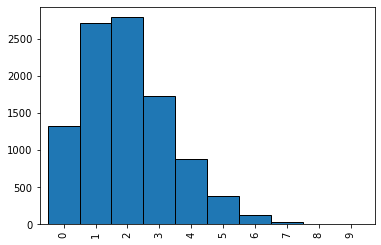

In [2]:
pd.Series(stats.poisson(2).rvs(10_000)).value_counts().sort_index().plot.bar(width=1, ec='black')
plt.show()

What is the probability that no cars drive up in the noon hour?

In [3]:
# Experimental

In [4]:
stats.poisson(2).pmf(0)

0.1353352832366127

What is the probability that 3 or more cars come through the drive through?

In [5]:
# Experimental

In [6]:
stats.poisson(2).sf(3)

0.14287653950145296

How likely is it that the drive through gets at least 1 car?

In [7]:
# Experimental

In [8]:
stats.poisson(2).cdf(1)

0.40600584970983794

Problem 2: Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

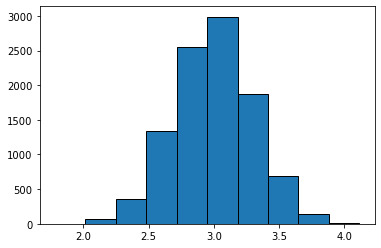

In [9]:
grades = pd.Series(stats.norm(3, 0.3).rvs(10_000))
plt.hist(grades,ec ='black')
plt.show()

What grade point average is required to be in the top 5% of the graduating class?

In [10]:
# Experimental

In [11]:
stats.norm(3, 0.3).isf(.05)

3.4934560880854417

What GPA constitutes the bottom 15% of the class?

In [12]:
# Experimental

In [13]:
stats.norm(3, 0.3).ppf(0.15)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. 

In [14]:
# Experimental

In [15]:
stats.norm(3, 0.3).ppf(0.2)

2.7475136299281258

In [16]:
stats.norm(3, 0.3).ppf(0.3)

2.842679846187588

## Students with a GPA of 2.75 to 2.84 fall in the third decile

Would a student with a 2.8 grade point average qualify for this scholarship?

In [17]:
# Experimental

In [18]:
stats.norm(3, 0.3).cdf(2.8)

0.2524925375469227

## Yes they would fall in the bottom 25 percentile of their class which falls in the range of the third decile.

If I have a GPA of 3.5, what percentile am I in?

In [19]:
# Experimental

In [20]:
stats.norm(3, 0.3).cdf(3.5)

0.9522096477271853

Problem 3: A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. 
How likely is it that this many people or more click through?

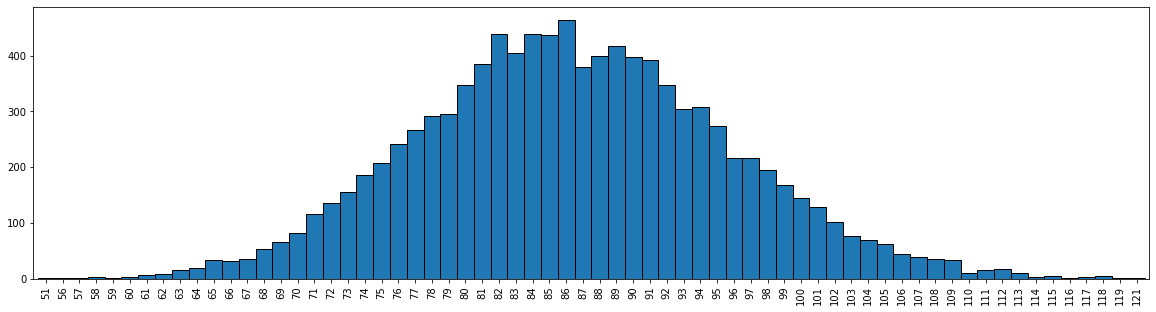

In [21]:
pd.Series(stats.binom(4326, 0.02).rvs(10_000)).value_counts().sort_index().plot.bar(figsize=(20,5), width=1, ec='black')
plt.show()

In [22]:
# Experimental

In [23]:
stats.binom(4326, 0.02).sf(97)

0.11781530585978467

Problem 4: You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 
Looking to save time, you put down random probabilities as the answer to each question.
What is the probability that at least one of your first 60 answers is correct?

In [24]:
n_trials = 10_000
n_problems = 60
blind_guess = np.random.binomial(60,0.01,size = (n_trials,n_problems))
one_right = blind_guess > 0
one_right.mean()

0.45252333333333333

In [25]:
stats.binom(60,0.01).sf(0)

0.45284335760923855

Problem 5: The codeup staff tends to get upset when the student break area is not cleaned up. 
Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, 
about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

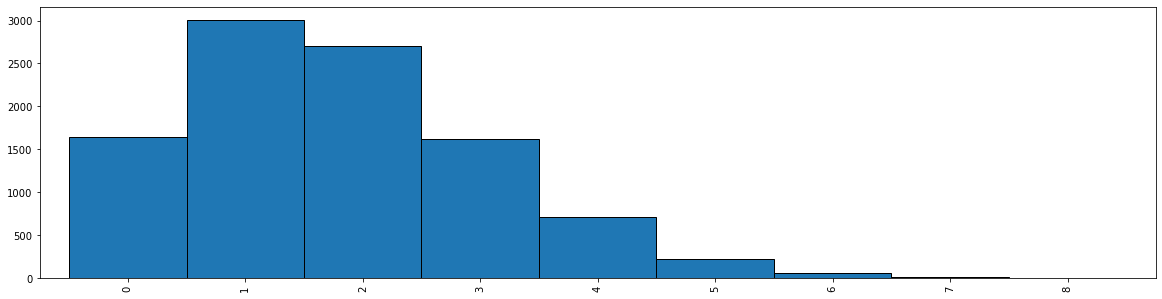

In [26]:
pd.Series(stats.binom(59, 0.03).rvs(10_000)).value_counts().sort_index().plot.bar(figsize=(20,5),width=1,ec='black')
plt.show()

In [27]:
students_who_visit = 22 * 3 * 0.9
chance_of_cleaning = 0.03



In [28]:
stats.binom(59,0.03).sf(0)

0.8342199288437352

How likely is it that it goes two days without getting cleaned up?

In [29]:
# Experimental

In [30]:
stats.binom(118,0.03).cdf(0)

0.02748303199257622

All week?

In [31]:
# Experimental

In [32]:
stats.binom(413,0.03).cdf(0)

3.441329456988011e-06

Problem 6: You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [33]:
mean_line_length = 15
std_line_lenght = 3
order_time_per_person = 2
time_after_order = 10
# (60 min lunch time) - (15 min to eat) - (10 min from order to completion) = 
# (35 min to get the order in) / (2 min per customer) = (17 customers max to get food on time)  

(np.random.normal(15, 3, size=10_000) <= 17).mean()

0.7435

In [34]:
stats.norm(15, 3).cdf(17)

0.7475074624530771

Problem 7: Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [41]:
from env import host, user, password, get_db_url

In [46]:
url = get_db_url('employees', user, password, host)

In [60]:
salary = pd.read_sql('''

SELECT salary 
FROM salaries 
WHERE to_date = '9999-01-01' 

''', url)
salary.head(5)

,salary
0,88958
1,72527
2,43311
3,74057
4,94692


In [77]:
salary.agg("mean")

salary    72012.235857
dtype: float64

In [78]:
salary.agg("std")

salary    17309.99538
dtype: float64

What percent of employees earn less than 60,000?

What percent of employees earn more than 95,000?

In [ ]:
# Experimental

In [ ]:
# Theoretical

What percent of employees earn between 65,000 and 80,000?

In [ ]:
# Experimental

In [ ]:
# Theoretical

What do the top 5% of employees make?
Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql.

In [ ]:
# Experimental

In [ ]:
# Theoretical

Be sure to run the following 2 commands from your terminal: 1. cp ~/codeup-data-science/numpy-pandas-visualization-exercises/.gitignore ~/codeup-data-science/statistics-exercises to ensure that your stats repo has a known-good gitignore 2. cp ~/codeup-data-science/numpy-pandas-exercises/env.py ~/codeup-data-science/statistics-exercises to ensure that pandas will have access to your db credentials.